In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [69]:
data = pd.read_csv('Position_Salaries.csv')
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [70]:
X = data.iloc[ : , 1: -1].values 
y = data.iloc[: , -1].values

#### Polynomail Regression

Let us check what the linear regression will be like

In [71]:
from sklearn.linear_model import LinearRegression
lin_reg_1 = LinearRegression()
lin_reg_1.fit(X, y)


LinearRegression()

#### Make it a polynomial of degree two

In [72]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg_2 = PolynomialFeatures(degree=2)
X_poly = poly_reg_2.fit_transform(X)


#### Train the model using linear regression after tunning it to degree two

In [73]:
from sklearn.linear_model import LinearRegression
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)


LinearRegression()

### Visualisation of linear regression without tuning

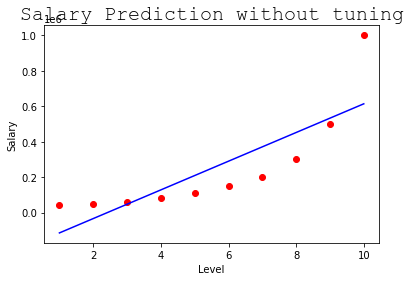

In [74]:
plt.scatter(X, y, color='red') 
plt.plot(X, lin_reg_1.predict(X), color='blue')


plt.title('Salary Prediction without tuning', fontdict={'fontname':'Courier New', 'fontsize':20 })
plt.xlabel('Level')
plt.ylabel('Salary')

plt.rcParams['figure.figsize'] = 10,5

plt.show()

This shows that without tuning the X into degrees n >= 2 it will behave poorly

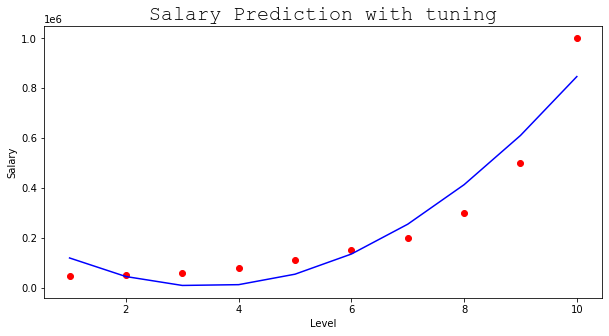

In [84]:
plt.scatter(X, y, color='red') 
plt.plot(X, lin_reg_2.predict(X_poly), color='blue') # using the tuned X


plt.title('Salary Prediction with tuning', fontdict={'fontname':'Courier New', 'fontsize':20 })
plt.xlabel('Level')
plt.ylabel('Salary')

plt.rcParams['figure.figsize'] = 10,5

plt.show()

In [77]:
lin_reg_2.predict(X_poly).shape

(10,)

#### Higher degree for better result

In [44]:
# degree = 4

from sklearn.preprocessing import PolynomialFeatures
poly_reg_4 = PolynomialFeatures(degree=4)
X_poly_4 = poly_reg_4.fit_transform(X)
X_poly_4.shape


(10, 5)

In [32]:
lin_reg_4 = LinearRegression()
lin_reg_4.fit(X_poly_4, y)

LinearRegression()

In [56]:
y_pred_4 = lin_reg_4.predict(X_poly_4)
y_pred_4

array([ 53356.64335691,  31759.90676   ,  58642.19114225,  94632.86713296,
       121724.94172506, 143275.05827517, 184003.49650353, 289994.17249408,
       528694.63869438, 988916.08391567])

Viusualization of higher degree 

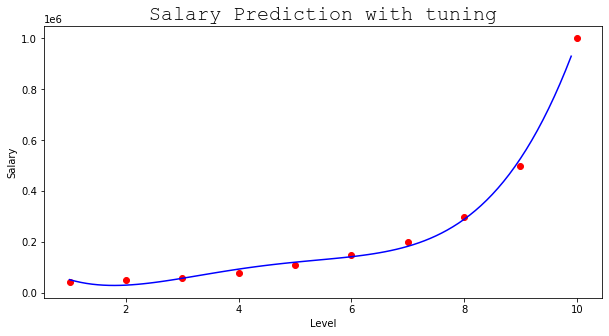

In [87]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(-1, 1)

X_grid_4 = poly_reg_4.fit_transform(X_grid) # transformation of X_grid to degree 4

y_grid_pred = lin_reg_4.predict(X_grid_4) # The answer of higher X
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, y_grid_pred, color='blue') # higher resolution 


plt.title('Salary Prediction with tuning', fontdict={'fontname':'Courier New', 'fontsize':20 })
plt.xlabel('Level')
plt.ylabel('Salary')
 
plt.rcParams['figure.figsize'] = 10, 5 
plt.show()

It way better with n=4

#### Predicting Single Observation


In [29]:
# Using the linear without tuning
y_pred = lin_reg_1.predict([[6.5]]) # Note that it must be a matrix
y_pred

array([330378.78787879])

In [35]:
# With tuning
y_pred = lin_reg_4.predict(poly_reg_4.transform([[6.5]])) # make sure you tune the X you want to predict
y_pred


array([158862.4526516])

This prediction is way better and degree n=4 is recommended